In [28]:
import pandas as pd

# Load the congestion data from the CSV file
congestion_df = pd.read_csv('congestion_data.csv')

# Print the first few rows to inspect the data
print(congestion_df.head(20))


    Step  Congestion
0      0    0.000000
1      1    0.000000
2      2    0.000000
3      3    0.000000
4      4    0.000000
5      5    0.000000
6      6    0.000000
7      7    0.000000
8      8    0.000000
9      9    0.000000
10    10    0.000000
11    11    0.000000
12    12    0.000000
13    13    0.000000
14    14    0.000000
15    15    3.630496
16    16    3.630496
17    17    3.630496
18    18    3.630496
19    19    3.630496


In [29]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Prepare data for LSTM
sequence_length = 10
X = []
y = []

for i in range(len(congestion_df) - sequence_length):
    X.append(congestion_df["Congestion"].values[i:i + sequence_length])
    y.append(congestion_df["Congestion"].values[i + sequence_length])

X = np.array(X).reshape(-1, sequence_length, 1)
y = np.array(y)


# Build the LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    LSTM(32, activation='relu', input_shape=(sequence_length, 1), return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=20, batch_size=16, validation_split=0.2)




Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 250.0483 - val_loss: 1.5776
Epoch 2/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.5661 - val_loss: 0.8738
Epoch 3/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.6190 - val_loss: 0.4690
Epoch 4/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.3408 - val_loss: 0.7558
Epoch 5/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 1.2564 - val_loss: 0.6015
Epoch 6/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.2597 - val_loss: 0.4291
Epoch 7/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.5900 - val_loss: 0.9962
Epoch 8/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.3835 - val_loss: 0.6341
Epoch 9/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1.2505 - val_loss: 1.4916
Epoch 10/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 1.3827 - val_loss: 0.4362
Epoch 11/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1.1726 - val_loss: 0.5647
Epoch 12/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


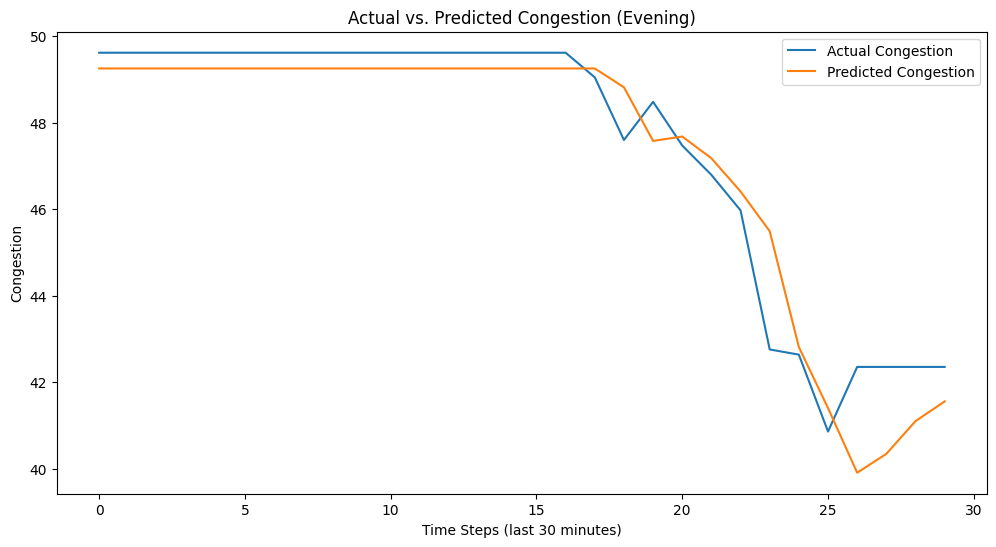

In [35]:


import matplotlib.pyplot as plt

# Predict the last 30 minutes of congestion
last_30_minutes_X = X[-30:]
predictions = model.predict(last_30_minutes_X)

# Get the actual values for the last 30 minutes
actual_values = y[-30:]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(actual_values, label='Actual Congestion')
plt.plot(predictions, label='Predicted Congestion')
plt.xlabel('Time Steps (last 30 minutes)')
plt.ylabel('Congestion')
plt.title('Actual vs. Predicted Congestion (Evening)')
plt.legend()

# Save the plot as an image
plt.savefig('congestion_prediction.png')
plt.show()

In [30]:
# Define the function to classify congestion levels
def classify_congestion(occupancy):
    if occupancy < 0.3:
        return "Low"
    elif 0.3 <= occupancy < 0.7:
        return "Moderate"
    else:
        return "High"

# Apply classification to the 'Congestion' column
congestion_df['Congestion Level'] = congestion_df['Congestion'].apply(classify_congestion)

# Print the updated dataframe with congestion levels
print(congestion_df.head())


   Step  Congestion Congestion Level
0     0         0.0              Low
1     1         0.0              Low
2     2         0.0              Low
3     3         0.0              Low
4     4         0.0              Low


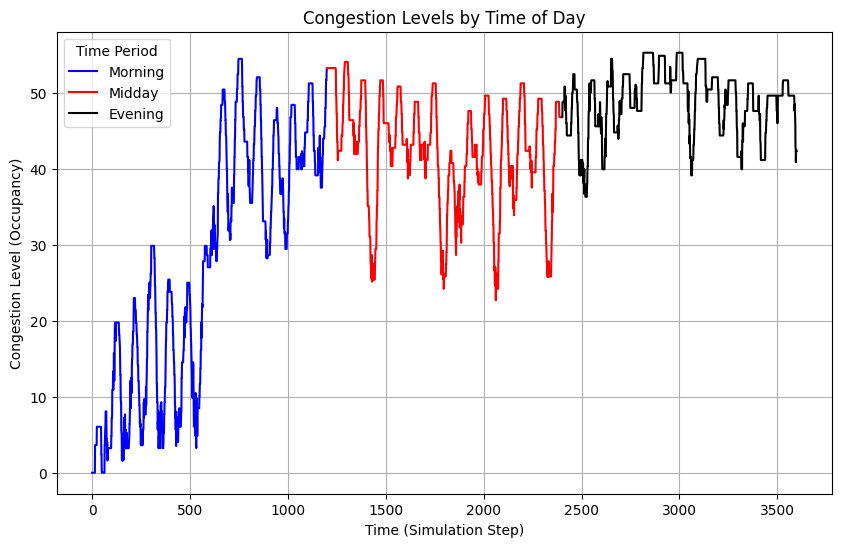

In [37]:
morning_end = 1200  # First 1200 seconds (morning)
midday_end = 2400   # Next 1200 seconds (midday)
evening_end = len(congestion_df)  # Rest of the time (evening)

# Categorize each step by time period
def categorize_time_period(step):
    if step < morning_end:
        return "Morning"
    elif step < midday_end:
        return "Midday"
    else:
        return "Evening"

# Apply time categorization
congestion_df['Time Period'] = congestion_df['Step'].apply(categorize_time_period)

# Plot congestion levels over time with time of day
plt.figure(figsize=(10, 6))
colors = {'Morning': 'blue', 'Midday': 'red', 'Evening': 'black'}

for period in ['Morning', 'Midday', 'Evening']:
    subset = congestion_df[congestion_df['Time Period'] == period]
    plt.plot(subset['Step'], subset['Congestion'], label=period, color=colors[period])

plt.xlabel('Time (Simulation Step)')
plt.ylabel('Congestion Level (Occupancy)')
plt.title('Congestion Levels by Time of Day')
plt.legend(title="Time Period")
plt.grid(True)
plt.savefig('Congestion Levels by Time of Day.png')
plt.show()

<Figure size 640x480 with 0 Axes>

In [32]:
# Define time intervals (morning, midday, evening)
morning_end = 1200  # First 1200 seconds (morning)
midday_end = 2400   # Next 1200 seconds (midday)
evening_end = len(congestion_df)  # Rest of the time (evening)

# Split the data by time period
morning_data = congestion_df[(congestion_df['Step'] < morning_end)]
midday_data = congestion_df[(congestion_df['Step'] >= morning_end) & (congestion_df['Step'] < midday_end)]
evening_data = congestion_df[(congestion_df['Step'] >= midday_end)]

# Calculate the average congestion for each period
avg_congestion = {
    'morning': morning_data['Congestion'].mean(),
    'midday': midday_data['Congestion'].mean(),
    'evening': evening_data['Congestion'].mean()
}

# Output the results
print("Average Congestion by Time Period:")
print(f"Morning: {avg_congestion['morning']:.2f}")
print(f"Midday: {avg_congestion['midday']:.2f}")
print(f"Evening: {avg_congestion['evening']:.2f}")


Average Congestion by Time Period:
Morning: 27.10
Midday: 42.27
Evening: 48.98
